In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.model_selection import learning_curve

from os import system

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score

import seaborn as sns

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [4]:
original_df = pd.read_csv("FpointsMin.csv")
df = pd.read_csv("FpointsMin.csv")
del df['gc_ratio_diff']
runtime15=df[df['runtime'] >= 14.8].index
df.drop(runtime15, inplace=True)
train_df, test_df = train_test_split(df, test_size = 0.2)
train_df, validation_df = train_test_split(train_df, test_size=0.2)
validation_y = validation_df['runtime'].values
test_y = test_df['runtime'].values

In [5]:
train_df.describe(include='all')

,c_avg_deg_cons,c_avg_dom_cons,c_avg_domdeg_cons,c_bounds_d,c_bounds_r,c_bounds_z,c_cv_deg_cons,c_cv_dom_cons,c_cv_domdeg_cons,c_domain,...,v_ratio_bounded,v_ratio_vars,v_sum_deg_vars,v_sum_dom_vars,v_sum_domdeg_vars,number_of_teams,fixtures_left,number_of_constraints,runtime,fpoints
count,5024.000000,5024.000000,5024.000000,5024.0,5024.0,5024.0,5024.000000,5024.000000,5024.000000,5024.0,...,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000
mean,2.687298,4.589961,1.647571,0.0,0.0,0.0,0.530859,0.653740,0.421211,0.0,...,0.215400,0.972593,878.762540,863.974124,373.748427,7.665406,3.154459,2.974920,0.338185,14.335390
std,0.071732,0.431659,0.107465,0.0,0.0,0.0,0.069676,0.061135,0.059186,0.0,...,0.078639,0.006533,354.461375,358.462474,152.085841,1.403796,1.638560,1.413991,1.311378,5.753962
min,2.432620,3.669870,1.427480,0.0,0.0,0.0,0.412949,0.503628,0.278322,0.0,...,0.112381,0.950000,337.000000,338.000000,152.250000,6.000000,1.000000,1.000000,0.020000,2.000000
25%,2.663910,4.307170,1.574050,0.0,0.0,0.0,0.470743,0.607586,0.372963,0.0,...,0.169444,0.967742,594.000000,595.000000,253.631000,6.000000,2.000000,2.000000,0.030000,10.000000
50%,2.703300,4.684560,1.665070,0.0,0.0,0.0,0.525343,0.652438,0.422244,0.0,...,0.191729,0.973568,821.000000,799.000000,348.529000,7.000000,3.000000,3.000000,0.040000,14.000000
75%,2.737570,4.921758,1.733960,0.0,0.0,0.0,0.577830,0.699448,0.465198,0.0,...,0.226131,0.977728,1074.000000,1081.000000,461.080000,9.000000,4.000000,4.000000,0.060000,18.000000
max,2.824910,5.458690,1.887650,0.0,0.0,0.0,0.733933,0.835425,0.577362,0.0,...,0.596685,0.986547,2224.000000,2343.000000,967.419000,11.000000,9.000000,5.000000,14.710000,37.000000


In [6]:
def getAverages(lst, average_feature, average_result):
    copy_lst = lst.reset_index(drop=True)
#     print(lst.reset_index())
#     print(copy_lst[average_feature])
    averages = []
#     print(copy_lst[21])
    for value in range(1, copy_lst[average_feature].max()+1):
        value_indices = np.where(copy_lst[average_feature]==value)
        total=0
        for value_index in value_indices[0]:
            total += copy_lst[average_result][value_index]
        if len(value_indices[0]) != 0:
            averages.append([value, total/len(value_indices[0])])
    return averages

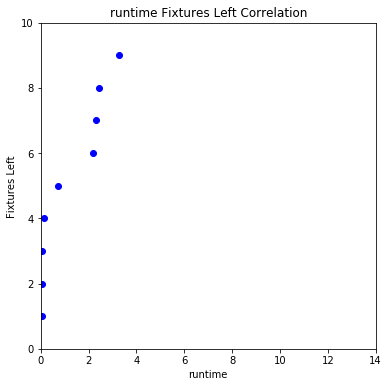

In [7]:
results = getAverages(train_df, 'fixtures_left', 'runtime')
runtime = []
fixtures_left = []
for item in results:
    runtime.append(item[1])
    fixtures_left.append(item[0])

fig = plt.figure(figsize=(6,6))
plt.title('runtime Fixtures Left Correlation')
plt.scatter(runtime, fixtures_left, color='blue', marker='o')
plt.xlabel('runtime')
plt.ylabel('Fixtures Left')
plt.xlim(0,14.0)
plt.ylim(0,10)
plt.show()

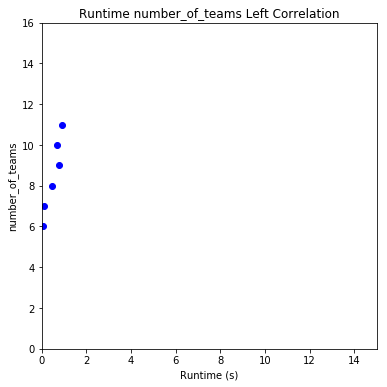

In [8]:
results = getAverages(train_df, 'number_of_teams', 'runtime')
runtime = []
number_of_teams = []
for item in results:
    runtime.append(item[1])
    number_of_teams.append(item[0])

fig = plt.figure(figsize=(6,6))
plt.title('Runtime number_of_teams Left Correlation')
plt.scatter(runtime, number_of_teams, color='blue', marker='o')
plt.xlabel('Runtime (s)')
plt.ylabel('number_of_teams')
plt.xlim(0,15.0)
plt.ylim(0,16)
plt.show()

In [9]:
train_y = train_df['runtime'].values
league_numeric_features = ['c_avg_deg_cons',
 'c_avg_dom_cons',
 'c_avg_domdeg_cons',
 'c_cv_deg_cons',
 'c_cv_dom_cons',
 'c_cv_domdeg_cons',
 'c_ent_deg_cons',
 'c_ent_dom_cons',
 'c_ent_domdeg_cons',
 'c_logprod_deg_cons',
 'c_logprod_dom_cons',
 'c_max_deg_cons',
 'c_max_dom_cons',
 'c_max_domdeg_cons',
 'c_num_cons',
 'c_ratio_cons',
 'c_sum_ari_cons',
 'c_sum_dom_cons',
 'c_sum_domdeg_cons',
 'd_bool_vars',
 'd_int_cons',
 'd_int_vars',
 'd_ratio_bool_vars',
 'd_ratio_int_cons',
 'd_ratio_int_vars',
 'o_deg',
 'o_deg_avg',
 'o_deg_cons',
 'o_deg_std',
 'o_dom',
 'o_dom_avg',
 'o_dom_std',
 'v_avg_deg_vars',
 'v_avg_dom_vars',
 'v_avg_domdeg_vars',
 'v_cv_deg_vars',
 'v_cv_dom_vars',
 'v_cv_domdeg_vars',
 'v_def_vars',
 'v_ent_deg_vars',
 'v_ent_dom_vars',
 'v_ent_domdeg_vars',
 'v_intro_vars',
 'v_logprod_deg_vars',
 'v_logprod_dom_vars',
 'v_max_deg_vars',
 'v_max_dom_vars',
 'v_max_domdeg_vars',
 'v_min_dom_vars',
 'v_min_domdeg_vars',
 'v_num_aliases',
 'v_num_consts',
 'v_num_vars',
 'v_ratio_bounded',
 'v_ratio_vars',
 'v_sum_deg_vars',
 'v_sum_dom_vars',
 'v_sum_domdeg_vars\n\n',
 'number_of_teams',
 'fixtures_left',
 'number_of_constraints']

null_league_numeric_values = [
    'v_min_deg_vars',
    'c_bounds_d',
    'c_bounds_r',
    'c_bounds_z',
    'd_ratio_set_cons',
    'd_ratio_set_vars',
    'd_set_cons',
    'd_set_vars',
    'gc_diff_globs',
    'gc_global_cons',
    'gc_ratio_diff',
    'gc_ratio_globs',
    's_bool_search',
    's_first_fail',
    's_goal',
    's_indomain_max',
    's_indomain_min',
    's_input_order',
    's_int_search',
    's_labeled_vars',
    's_other_val',
    's_other_var',
    's_set_search',
    'o_dom_deg',
    'd_ratio_float_cons',
    'd_ratio_float_vars',
    'c_min_deg_cons',
    'c_min_dom_cons',
    'c_min_domdeg_cons',
    'd_ratio_array_cons',
    'd_ratio_bool_cons',
    'd_float_cons',
    'd_float_vars',
    'd_array_cons',
    'd_bool_cons',
    'c_domain',
    'c_priority',
]

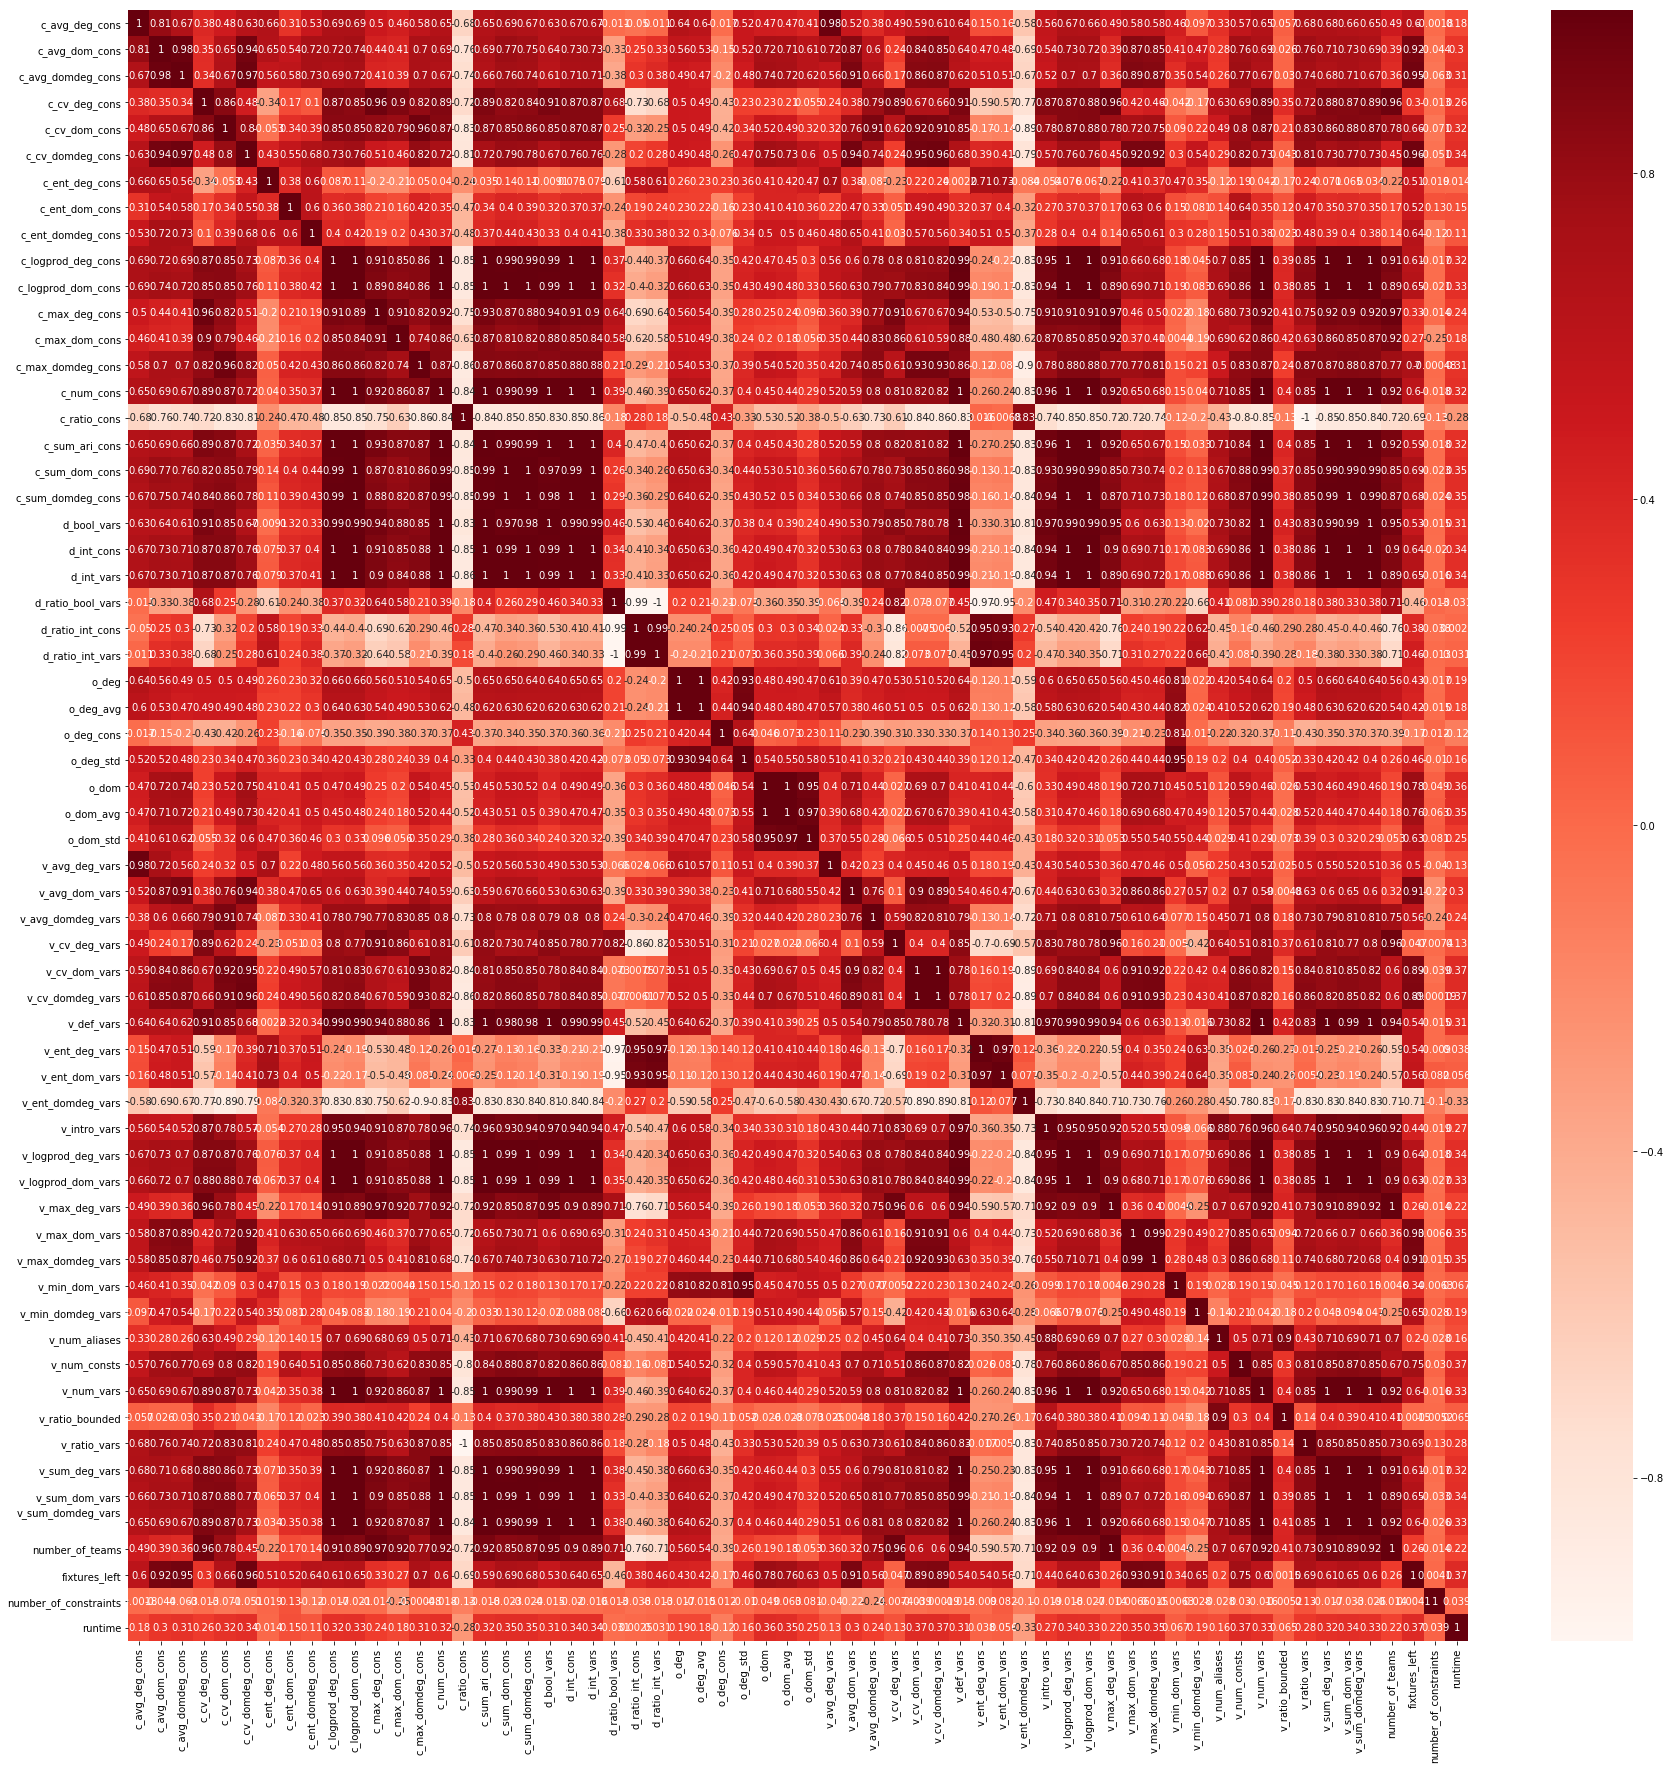

In [10]:
# split the features into sets of 5, check their correlation with output, and delete
# uncorrelated features
split_features = []
# league_numeric_features += ['result']
features_with_y = league_numeric_features
# train_df['result'] = train_y

for i in range(0, len(features_with_y), 10):
    split_features.append(features_with_y[i:i+10]+['runtime'])

# print(split_features)
# list(df.columns)
plt.figure(figsize=(30,30))
# cor = train_df[split_features[1]].corr()
cor = train_df[league_numeric_features+['runtime']].corr()
# print(train_df[split_features[1]].corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [11]:
random_forest = Pipeline([
    ('pre', ColumnTransformer([("num", FunctionTransformer(lambda x : x), league_numeric_features)], remainder="drop")),
    ("est", RandomForestRegressor(n_estimators=60, max_depth=10))
])

model = random_forest.fit(train_df, train_y)

In [12]:
np.mean(cross_val_score(random_forest, validation_df, validation_y, scoring="neg_mean_squared_error", cv=10))

-1.4530954710652604

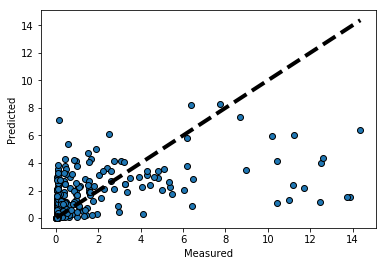

In [13]:
predicted = cross_val_predict(random_forest, validation_df, validation_y, cv=10)

fix, ax = plt.subplots()
ax.scatter(validation_y, predicted, edgecolors=(0,0,0))
ax.plot([validation_y.min(), validation_y.max()], [validation_y.min(), validation_y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [14]:
y_predicted = random_forest.predict(test_df)

In [15]:
scores = cross_validate(random_forest, test_df, test_y, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

Training error:  0.13864823360650663
Validation error:  0.9780491927814303


In [16]:
train_set_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, mses_train, mses_val = learning_curve(random_forest, train_df, train_y, train_sizes=train_set_sizes,
                                                  cv=10, scoring='neg_mean_squared_error')

mean_mses_train = np.mean(np.abs(mses_train), axis=1)
mean_mses_val = np.mean(np.abs(mses_val), axis=1)

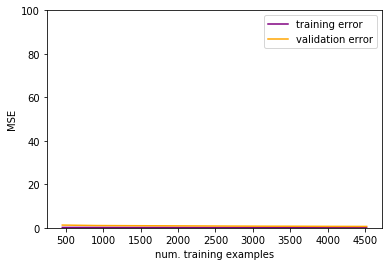

In [17]:
fig = plt.figure()
plt.xlabel("num. training examples")
plt.ylabel("MSE")
plt.ylim(0, 100)
plt.plot(train_sizes, mean_mses_train, label = "training error", color = "purple")
plt.plot(train_sizes, mean_mses_val, label = "validation error", color = "orange")
plt.legend()
plt.show()